In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
build_dir = "dataset"

generator = ImageDataGenerator(
    rescale = 1/255.0,
    zoom_range = 0.25,
    rotation_range = 10,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.4
)
train_generator = generator.flow_from_directory(
    build_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training'
)
val_generator = generator.flow_from_directory(
    build_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation'
)


Found 7395 images belonging to 6 classes.
Found 4925 images belonging to 6 classes.


In [3]:
import os
import pandas as pd

# Define local directory paths
caries_dir = 'D:\CDriveDesktopData\WebDev-ML\e-Clinic\dental-disease-identification\dataset\Caries\Caries\caries augmented data set\preview'
gingivitis_dir = 'D:\CDriveDesktopData\WebDev-ML\e-Clinic\dental-disease-identification\dataset\Gingivitis\Gingivitis'
toothDiscoloration_dir = 'D:\CDriveDesktopData\WebDev-ML\e-Clinic\dental-disease-identification\dataset\Tooth Discoloration\Tooth Discoloration\Tooth_discoloration_augmented_dataser\preview'
ulcers_dir = 'D:\CDriveDesktopData\WebDev-ML\e-Clinic\dental-disease-identification\dataset\Mouth Ulcer\Mouth Ulcer\Mouth_Ulcer_augmented_DataSet\preview'
hypodontia_dir = 'D:\CDriveDesktopData\WebDev-ML\e-Clinic\dental-disease-identification\dataset\hypodontia\hypodontia'
calculus_dir = 'D:\CDriveDesktopData\WebDev-ML\e-Clinic\dental-disease-identification\dataset\Calculus\Calculus'
# Creating a DataFrame with image counts
image_counts_df = pd.DataFrame(data=[len(os.listdir(caries_dir)),
                                     len(os.listdir(gingivitis_dir)),
                                     len(os.listdir(toothDiscoloration_dir)),
                                     len(os.listdir(ulcers_dir)),
                                     len(os.listdir(hypodontia_dir)),
                                     len(os.listdir(calculus_dir))
                                    ],
                               index=['Caries Images', 'Gingivitis Images',
                                      'Tooth Discoloration Images', 'Ulcers Images',
                                      'Hypodontia Images', 'Calculus Images'],
                               columns=['Total Images'])

# Displaying the DataFrame
print(image_counts_df)


                            Total Images
Caries Images                       2382
Gingivitis Images                   2349
Tooth Discoloration Images          1834
Ulcers Images                       2541
Hypodontia Images                   1251
Calculus Images                     1297


<BarContainer object of 6 artists>

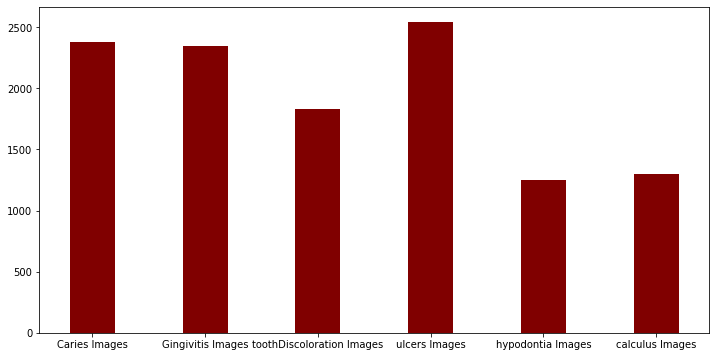

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 6))
plt.bar(['Caries Images', 'Gingivitis Images', 'toothDiscoloration Images', 'ulcers Images', 'hypodontia Images', 'calculus Images'],
        [len(os.listdir(caries_dir)), len(os.listdir(gingivitis_dir)),
                   len(os.listdir(toothDiscoloration_dir)), len(os.listdir(ulcers_dir)),
                    len(os.listdir(hypodontia_dir)), len(os.listdir(calculus_dir))], color ='maroon', width = 0.4)


In [5]:
from keras.applications import Xception
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from keras import Model

res = Xception(weights ='imagenet', include_top = False,
               input_shape = (150, 150, 3))

res.trainable = False
x= res.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)

x = Dense(6, activation ='softmax')(x)
model = Model(res.input, x)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 18, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 18, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 9, 9, 728)    186368      ['add_1[0][0]']                  
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 9, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 9, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 9, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 9, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 9, 9, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 9, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (Add)                   (None, 9, 9, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_9[0][0]']                  
                                                                                                  
 block13_sepconv1_act (Activati  (None, 9, 9, 728)   0           ['add_10[0][0]']                 
 on)      

                                                                                                  
Total params: 22,121,518
Trainable params: 1,253,894
Non-trainable params: 20,867,624
__________________________________________________________________________________________________


In [6]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

num_epochs = 8 
num_batch_size = 200

checkpointer = ModelCheckpoint(filepath='oral_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now() 

model.fit(train_generator, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=val_generator, callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/8
232/232 [==============================] - ETA: 0s - loss: 1.4043 - accuracy: 0.4792
Epoch 1: val_loss improved from inf to 1.00571, saving model to oral_classification.hdf5
232/232 [==============================] - 543s 2s/step - loss: 1.4043 - accuracy: 0.4792 - val_loss: 1.0057 - val_accuracy: 0.5626
Epoch 2/8
232/232 [==============================] - ETA: 0s - loss: 1.0912 - accuracy: 0.5794
Epoch 2: val_loss improved from 1.00571 to 0.89674, saving model to oral_classification.hdf5
232/232 [==============================] - 485s 2s/step - loss: 1.0912 - accuracy: 0.5794 - val_loss: 0.8967 - val_accuracy: 0.6524
Epoch 3/8
232/232 [==============================] - ETA: 0s - loss: 1.0091 - accuracy: 0.6032
Epoch 3: val_loss did not improve from 0.89674
232/232 [==============================] - 483s 2s/step - loss: 1.0091 - accuracy: 0.6032 - val_loss: 0.9005 - val_accuracy: 0.6443
Epoch 4/8
232/232 [==============================] - ETA: 0s - loss: 0.9269 - accuracy: 0.

In [7]:
evaluation = model.evaluate(val_generator)
print("Validation Loss: {:.4f}".format(evaluation[0]))

print("Validation Accuracy: {:.2f}%".format(evaluation[1] * 100))


154/154 [==============================] - 193s 1s/step - loss: 0.7902 - accuracy: 0.6924
Validation Loss: 0.7902
Validation Accuracy: 69.24%


In [8]:
import keras.utils as image
import numpy as np

img_path = "./download.jpeg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

prediction = model.predict(img_array)
print("Predicted class probabilities:", prediction)


1/1 [==============================] - 1s 975ms/step
Predicted class probabilities: [[0.59072226 0.0119102  0.321177   0.00195019 0.07019429 0.00404608]]


In [9]:
class_labels = ['Caries', 'Gingivitis', 'Tooth Discoloration', 'Mouth Ulcer', 'Hypodontia', 'Calculus']
predicted_class_index = np.argmax(prediction)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class label:", predicted_class_label)
print("Predicted class probabilities:", prediction)


Predicted class label: Caries
Predicted class probabilities: [[0.59072226 0.0119102  0.321177   0.00195019 0.07019429 0.00404608]]


In [10]:
model.save('dental_classification.h5') 